<a href="https://colab.research.google.com/github/taranaahad5-hue/NPHA-/blob/main/NPHA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
!pip install ucimlrepo
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler



In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
national_poll_on_healthy_aging_npha = fetch_ucirepo(id=936)

# data (as pandas dataframes)
X = national_poll_on_healthy_aging_npha.data.features
y = national_poll_on_healthy_aging_npha.data.targets

# metadata
print(national_poll_on_healthy_aging_npha.metadata)

# variable information
print(national_poll_on_healthy_aging_npha.variables)


{'uci_id': 936, 'name': 'National Poll on Healthy Aging (NPHA)', 'repository_url': 'https://archive.ics.uci.edu/dataset/936/national+poll+on+healthy+aging+(npha)', 'data_url': 'https://archive.ics.uci.edu/static/public/936/data.csv', 'abstract': 'This is a subset of the NPHA dataset filtered down to develop and validate machine learning algorithms for predicting the number of doctors a survey respondent sees in a year. This dataset’s records represent seniors who responded to the NPHA survey.\n', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 714, 'num_features': 14, 'feature_types': ['Categorical'], 'demographics': ['Age', 'Race', 'Gender'], 'target_col': ['Number_of_Doctors_Visited'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2017, 'last_updated': 'Mon Dec 11 2023', 'dataset_doi': 'https://doi.org/10.3886/ICPSR37305.v1', 'creators': [], 'intro_paper': {'ID': 3

**K-Means**

In [ ]:
X.columns.tolist()

['Age',
 'Physical_Health',
 'Mental_Health',
 'Dental_Health',
 'Employment',
 'Stress_Keeps_Patient_from_Sleeping',
 'Medication_Keeps_Patient_from_Sleeping',
 'Pain_Keeps_Patient_from_Sleeping',
 'Bathroom_Needs_Keeps_Patient_from_Sleeping',
 'Uknown_Keeps_Patient_from_Sleeping',
 'Trouble_Sleeping',
 'Prescription_Sleep_Medication',
 'Race',
 'Gender']

In [ ]:
features_for_clustering = [
    'Physical_Health',
    'Mental_Health',
    'Dental_Health',
    'Trouble_Sleeping',
    'Employment'
]

X_sel = X[features_for_clustering].copy()

# check missing
print(X_sel.isna().sum())

# scale (k-means is distance-based)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sel)

Physical_Health     0
Mental_Health       0
Dental_Health       0
Trouble_Sleeping    0
Employment          0
dtype: int64


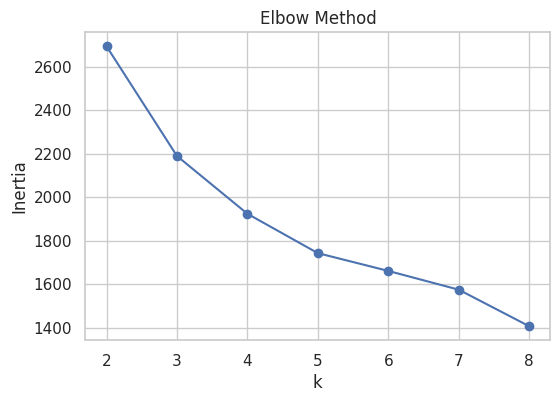

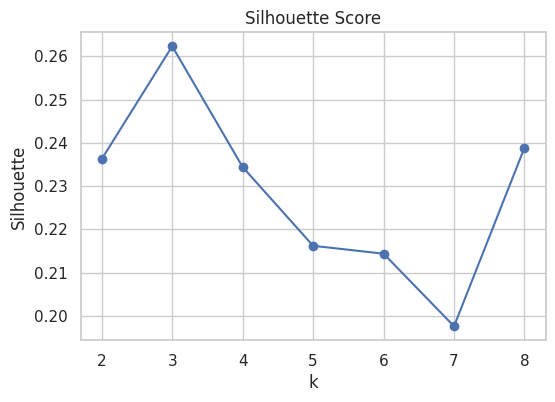

In [ ]:
inertias = []
sil_scores = []
k_range = range(2, 9)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels_k = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels_k))

# elbow
plt.figure(figsize=(6,4))
plt.plot(list(k_range), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

# silhouette
plt.figure(figsize=(6,4))
plt.plot(list(k_range), sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.show()

In [ ]:
k_final = 3

kmeans = KMeans(n_clusters=k_final, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_scaled)

# Attach cluster labels to full dataframe
clustered_df = X.copy()
clustered_df['cluster'] = labels

# Quick checks
clustered_df['cluster'].value_counts().sort_index()
clustered_df.head()

,Age,Physical_Health,Mental_Health,Dental_Health,Employment,Stress_Keeps_Patient_from_Sleeping,Medication_Keeps_Patient_from_Sleeping,Pain_Keeps_Patient_from_Sleeping,Bathroom_Needs_Keeps_Patient_from_Sleeping,Uknown_Keeps_Patient_from_Sleeping,Trouble_Sleeping,Prescription_Sleep_Medication,Race,Gender,cluster
0,2,4,3,3,3,0,0,0,0,1,2,3,1,2,1
1,2,4,2,3,3,1,0,0,1,0,3,3,1,1,1
2,2,3,2,3,3,0,0,0,0,1,3,3,4,1,0
3,2,3,2,3,3,0,0,0,1,0,3,3,4,2,0
4,2,3,3,3,3,1,0,0,0,0,2,3,1,2,1


In [ ]:
# Means of clustering features per cluster
cluster_profiles = clustered_df.groupby('cluster')[features_for_clustering].mean()
display(cluster_profiles)

# If you want to see demographics per cluster:
demo_cols = ['Age', 'Race', 'Gender', 'Employment']
clustered_df.groupby('cluster')[demo_cols].mean(numeric_only=True)

,Physical_Health,Mental_Health,Dental_Health,Trouble_Sleeping,Employment
cluster,,,,,
0,2.237013,1.444805,2.246753,2.571429,3.003247
1,3.464052,2.594771,3.839869,2.196078,3.035948
2,2.460000,1.810000,2.820000,2.550000,1.500000


,Age,Race,Gender,Employment
cluster,,,,
0,2.0,1.340909,1.587662,3.003247
1,2.0,1.473856,1.545752,3.035948
2,2.0,1.540000,1.450000,1.500000


In [ ]:
for col in ['Race', 'Gender', 'Employment']:
    print(f'\n=== {col} distribution by cluster ===')
    print(clustered_df.groupby('cluster')[col].value_counts(normalize=True))


=== Race distribution by cluster ===
cluster  Race
0        1       0.834416
         2       0.077922
         4       0.061688
         3       0.012987
         5       0.012987
1        1       0.794118
         2       0.075163
         4       0.065359
         5       0.035948
         3       0.029412
2        1       0.780000
         3       0.070000
         2       0.050000
         4       0.050000
         5       0.050000
Name: proportion, dtype: float64

=== Gender distribution by cluster ===
cluster  Gender
0        2         0.587662
         1         0.412338
1        2         0.545752
         1         0.454248
2        1         0.550000
         2         0.450000
Name: proportion, dtype: float64

=== Employment distribution by cluster ===
cluster  Employment
0        3             0.983766
         4             0.009740
         2             0.006494
1        3             0.944444
         4             0.045752
         2             0.009804
2        1  

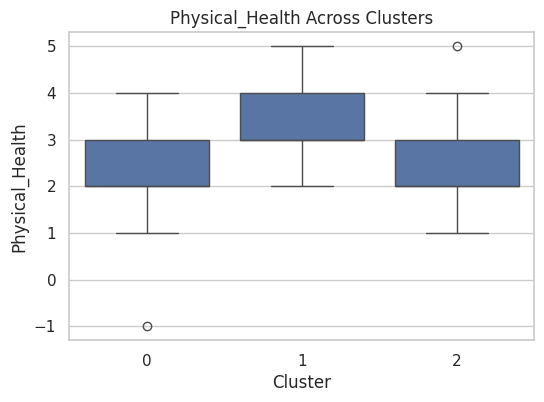

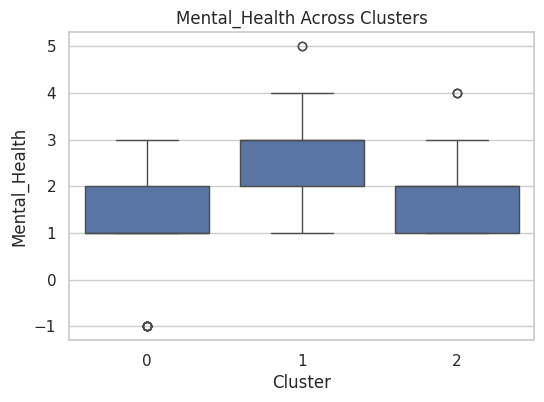

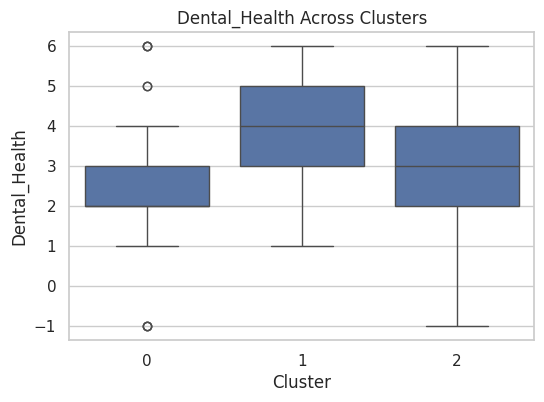

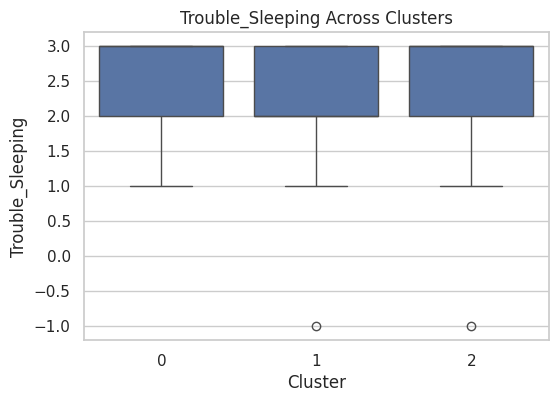

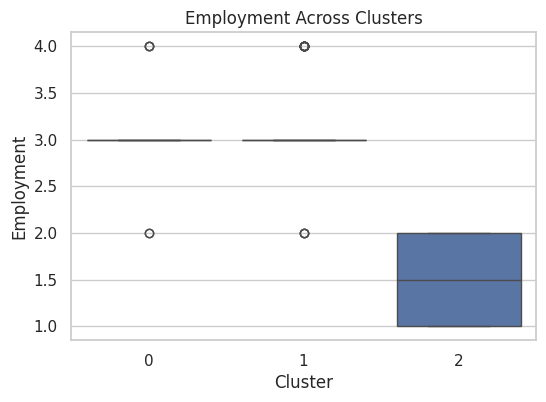

In [ ]:
for col in features_for_clustering:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=clustered_df, x='cluster', y=col)
    plt.title(f'{col} Across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.show()

In [ ]:
y_true = national_poll_on_healthy_aging_npha.data.targets['Number_of_Doctors_Visited']


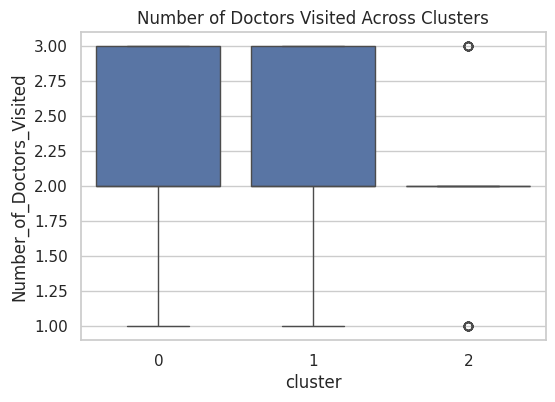

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=clustered_df, x='cluster', y= y_true)
plt.title('Number of Doctors Visited Across Clusters')
plt.show()

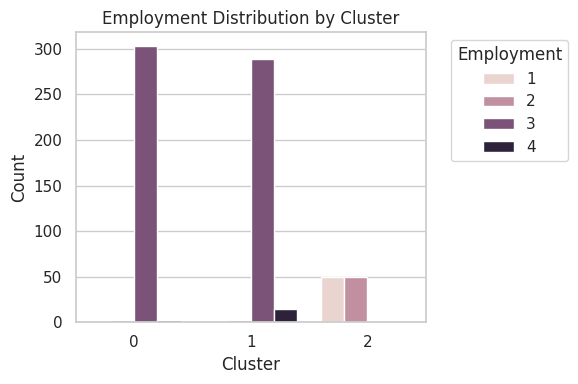

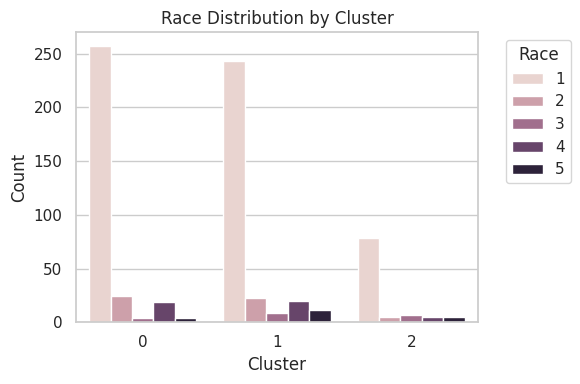

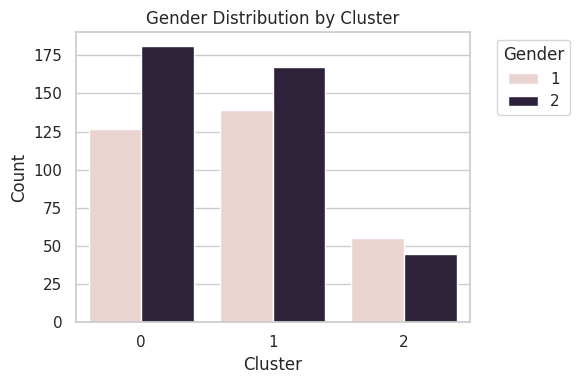

In [ ]:
for col in ['Employment', 'Race', 'Gender']:
    plt.figure(figsize=(6,4))
    sns.countplot(data=clustered_df, x='cluster', hue=col)
    plt.title(f'{col} Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

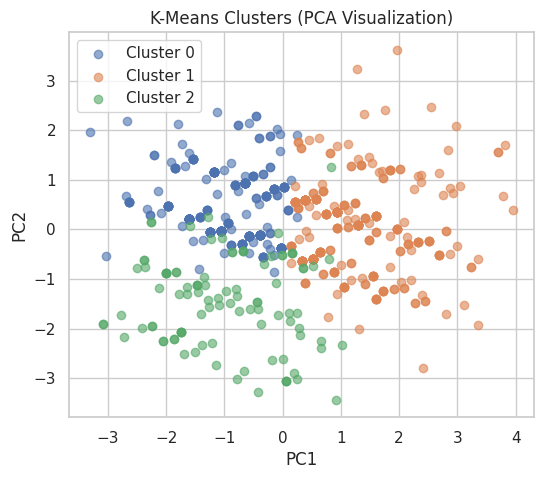

array([0.36681907, 0.20606517])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = labels

plt.figure(figsize=(6,5))
for c in range(k_final):
    subset = pca_df[pca_df['cluster'] == c]
    plt.scatter(subset['PC1'], subset['PC2'], alpha=0.6, label=f'Cluster {c}')

plt.title('K-Means Clusters (PCA Visualization)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

pca.explained_variance_ratio_

In [ ]:
clustered_df.columns

Index(['Age', 'Physical_Health', 'Mental_Health', 'Dental_Health',
       'Employment', 'Stress_Keeps_Patient_from_Sleeping',
       'Medication_Keeps_Patient_from_Sleeping',
       'Pain_Keeps_Patient_from_Sleeping',
       'Bathroom_Needs_Keeps_Patient_from_Sleeping',
       'Uknown_Keeps_Patient_from_Sleeping', 'Trouble_Sleeping',
       'Prescription_Sleep_Medication', 'Race', 'Gender', 'cluster'],
      dtype='object')

In [ ]:
print(type(y))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
y_true = y['Number_of_Doctors_Visited']
y_pred = clustered_df['cluster']

accuracy = accuracy_score(y_true, y_pred)
weighted_f1 = f1_score(y_true, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Weighted F1:", weighted_f1)

Accuracy: 0.1484593837535014
Weighted F1: 0.16698183753197202


In [ ]:
clustered_df['Number_of_Doctors_Visited'] = y_true

In [ ]:
cluster_counts = clustered_df['cluster'].value_counts().sort_index()
cluster_counts

,count
cluster,
0,308
1,306
2,100


In [ ]:
pd.DataFrame({
    'Cluster': cluster_counts.index,
    'Count': cluster_counts.values
})

,Cluster,Count
0,0,308
1,1,306
2,2,100


**EDA**

In [ ]:
from ucimlrepo import fetch_ucirepo
npha = fetch_ucirepo(id=936)
df = npha.data.features.copy()
df.columns

Index(['Age', 'Physical_Health', 'Mental_Health', 'Dental_Health',
       'Employment', 'Stress_Keeps_Patient_from_Sleeping',
       'Medication_Keeps_Patient_from_Sleeping',
       'Pain_Keeps_Patient_from_Sleeping',
       'Bathroom_Needs_Keeps_Patient_from_Sleeping',
       'Uknown_Keeps_Patient_from_Sleeping', 'Trouble_Sleeping',
       'Prescription_Sleep_Medication', 'Race', 'Gender'],
      dtype='object')

In [ ]:
gender_map = {1: "Male", 2: "Female"}
df["Gender"] = df["Gender"].map(gender_map)
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
X = npha.data.features.copy()
y = npha.data.targets.copy()

df = pd.concat([X, y], axis=1)
bins = [0, 1, 3, 100]   # 0–1, 2–3, 4+
labels = ["0–1", "2–3", "4+"]

df["doctor_visits_group"] = pd.cut(
    df["Number_of_Doctors_Visited"],
    bins=bins,
    labels=labels,
    right=True
)

df["doctor_visits_group"].value_counts()

,count
doctor_visits_group,
2–3,583
0–1,131
4+,0


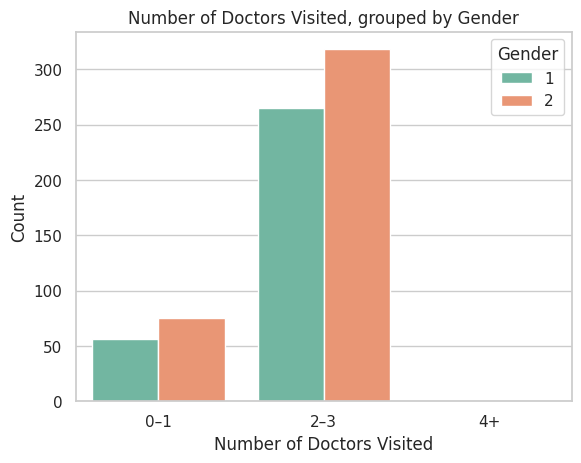

In [ ]:
plt.figure()
sns.countplot(
    data=df,
    x="doctor_visits_group",
    hue="Gender",
    palette="Set2"
)
plt.title("Number of Doctors Visited, grouped by Gender")
plt.xlabel("Number of Doctors Visited")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

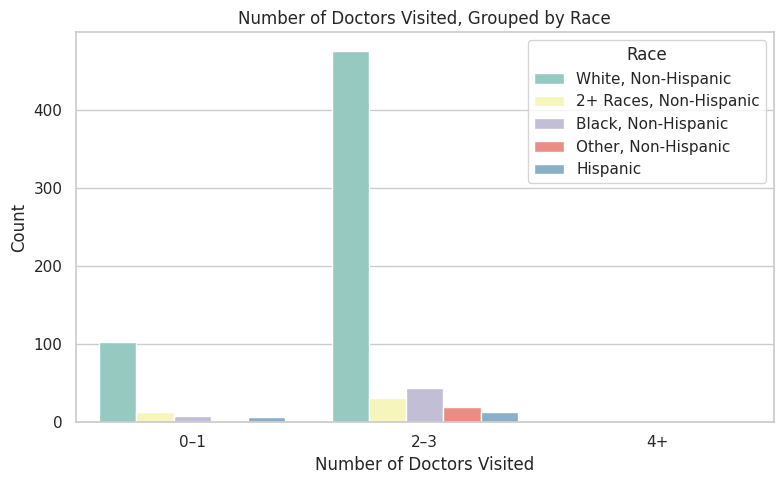

In [ ]:
X = npha.data.features.copy()
y = npha.data.targets.copy()
df = pd.concat([X, y], axis=1)

race_map = {
    1: "White, Non-Hispanic",
    2: "Black, Non-Hispanic",
    3: "Hispanic",
    4: "2+ Races, Non-Hispanic",
    5: "Other, Non-Hispanic"
}

df["Race_Label"] = df["Race"].map(race_map)

# Bin doctor visits
bins = [0, 1, 3, 100]
labels = ["0–1", "2–3", "4+"]

df["doctor_visits_group"] = pd.cut(
    df["Number_of_Doctors_Visited"],
    bins=bins,
    labels=labels,
    right=True
)

# DROP rows with missing race
df_race = df.dropna(subset=["Race_Label"])

#Plot: Doctor visits by Race
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_race,
    x="doctor_visits_group",
    hue="Race_Label",
    palette="Set3"
)

plt.title("Number of Doctors Visited, Grouped by Race")
plt.xlabel("Number of Doctors Visited")
plt.ylabel("Count")
plt.legend(title="Race")
plt.tight_layout()
plt.show()

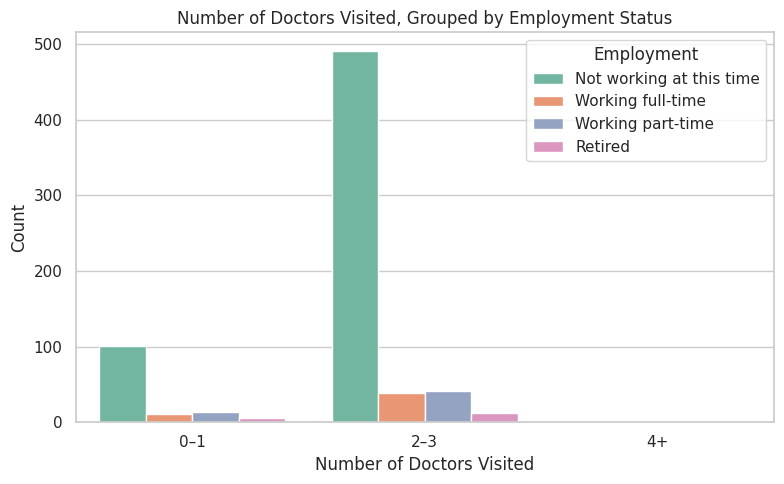

In [ ]:
bins = [0, 1, 3, 100]
labels = ["0–1", "2–3", "4+"]

df["doctor_visits_group"] = pd.cut(
    df["Number_of_Doctors_Visited"],
    bins=bins,
    labels=labels,
    right=True
)

#Employment
employment_map = {
    1: "Working full-time",
    2: "Working part-time",
    3: "Not working at this time",
    4: "Retired"
}

df["Employment_Label"] = df["Employment"].map(employment_map)

# drop rows with missing employment
df_emp = df.dropna(subset=["Employment_Label"])

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_emp,
    x="doctor_visits_group",
    hue="Employment_Label",
    palette="Set2"
)

plt.title("Number of Doctors Visited, Grouped by Employment Status")
plt.xlabel("Number of Doctors Visited")
plt.ylabel("Count")
plt.legend(title="Employment")
plt.tight_layout()
plt.show()

/tmp/ipython-input-4194512559.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


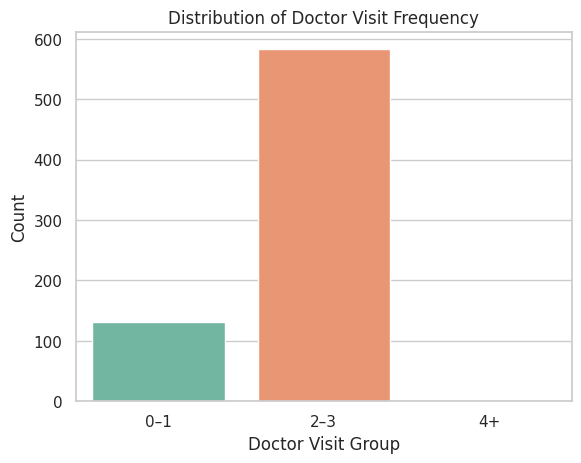

In [ ]:
sns.countplot(
    data=df,
    x="doctor_visits_group",
    palette="Set2"
)
plt.title("Distribution of Doctor Visit Frequency")
plt.xlabel("Doctor Visit Group")
plt.ylabel("Count")
plt.show()

# RANDOM FOREST:

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    f1_score
)

sns.set(style="whitegrid")
RANDOM_STATE = 3001

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

npha = fetch_ucirepo(id=936)

X = npha.data.features.copy()
y = npha.data.targets.copy()
df = pd.concat([X, y], axis=1)

print("Shape:", df.shape)
display(df.head())
display(df.info())

Shape: (714, 15)


,Age,Physical_Health,Mental_Health,Dental_Health,Employment,Stress_Keeps_Patient_from_Sleeping,Medication_Keeps_Patient_from_Sleeping,Pain_Keeps_Patient_from_Sleeping,Bathroom_Needs_Keeps_Patient_from_Sleeping,Uknown_Keeps_Patient_from_Sleeping,Trouble_Sleeping,Prescription_Sleep_Medication,Race,Gender,Number_of_Doctors_Visited
0,2,4,3,3,3,0,0,0,0,1,2,3,1,2,3
1,2,4,2,3,3,1,0,0,1,0,3,3,1,1,2
2,2,3,2,3,3,0,0,0,0,1,3,3,4,1,3
3,2,3,2,3,3,0,0,0,1,0,3,3,4,2,1
4,2,3,3,3,3,1,0,0,0,0,2,3,1,2,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Age                                         714 non-null    int64
 1   Physical_Health                             714 non-null    int64
 2   Mental_Health                               714 non-null    int64
 3   Dental_Health                               714 non-null    int64
 4   Employment                                  714 non-null    int64
 5   Stress_Keeps_Patient_from_Sleeping          714 non-null    int64
 6   Medication_Keeps_Patient_from_Sleeping      714 non-null    int64
 7   Pain_Keeps_Patient_from_Sleeping            714 non-null    int64
 8   Bathroom_Needs_Keeps_Patient_from_Sleeping  714 non-null    int64
 9   Uknown_Keeps_Patient_from_Sleeping          714 non-null    int64
 10  Trouble_Sleeping                      

None

In [ ]:
TARGET = "Number_of_Doctors_Visited"

X = df.drop(columns=[TARGET, "Age"])

y = df[TARGET]

X_encoded = pd.get_dummies(X, dtype=int)

print("Encoded feature shape:", X_encoded.shape)
display(X_encoded.head())

Encoded feature shape: (714, 13)


,Physical_Health,Mental_Health,Dental_Health,Employment,Stress_Keeps_Patient_from_Sleeping,Medication_Keeps_Patient_from_Sleeping,Pain_Keeps_Patient_from_Sleeping,Bathroom_Needs_Keeps_Patient_from_Sleeping,Uknown_Keeps_Patient_from_Sleeping,Trouble_Sleeping,Prescription_Sleep_Medication,Race,Gender
0,4,3,3,3,0,0,0,0,1,2,3,1,2
1,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,3,3,3,1,0,0,0,0,2,3,1,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.25,
    random_state=RANDOM_STATE,
    stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (535, 13) Test size: (179, 13)


In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels=None,
                          title="Confusion Matrix",
                          normalize=False,
                          figsize=(7, 5)):


    if labels is None:
        labels = np.unique(y_true)

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1, keepdims=True)
        cm = np.round(cm, 3)

    plt.figure(figsize=figsize)
    sns.heatmap(
        cm,
        annot=True,
        fmt=".3f" if normalize else "d",
        cmap="Blues",
        cbar=False,
        linewidths=0.7,
        linecolor="black",
        xticklabels=labels,
        yticklabels=labels,
        annot_kws={"size": 12}
    )
    plt.title(title, fontsize=15, pad=15)
    plt.xlabel("Predicted Label", fontsize=13)
    plt.ylabel("True Label", fontsize=13)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.tight_layout()
    plt.show()


def plot_feature_importances(model, feature_names, title="Feature Importances", top_n=None):

    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # descending

    if top_n is not None:
        indices = indices[:top_n]

    sorted_features = [feature_names[i] for i in indices]
    sorted_importances = importances[indices]

    plt.figure(figsize=(8, max(4, len(sorted_features) * 0.3)))
    sns.barplot(
        x=sorted_importances,
        y=sorted_features,
        palette="Blues_r"
    )
    plt.title(title, fontsize=15, pad=15)
    plt.xlabel("Importance", fontsize=13)
    plt.ylabel("Feature", fontsize=13)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.tight_layout()
    plt.show()


def evaluate_model(model, X_train, y_train, X_test, y_test, name="Model"):


    print(f"\n{name}")

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average="macro")

    print(f"Test Accuracy: {acc:.3f}")
    print(f"Test Macro F1: {macro_f1:.3f}\n")

    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=3))

    labels = np.unique(y_test)

    plot_confusion_matrix(
        y_test,
        y_pred,
        labels=labels,
        title=f"{name} – Confusion Matrix",
        normalize=False
    )

    plot_confusion_matrix(
        y_test,
        y_pred,
        labels=labels,
        title=f"{name} – Confusion Matrix (Normalized by True Class)",
        normalize=True
    )



Vanilla Random Forest
Test Accuracy: 0.425
Test Macro F1: 0.329

Classification Report:
              precision    recall  f1-score   support

           1      0.211     0.121     0.154        33
           2      0.532     0.634     0.578        93
           3      0.265     0.245     0.255        53

    accuracy                          0.425       179
   macro avg      0.336     0.334     0.329       179
weighted avg      0.394     0.425     0.404       179



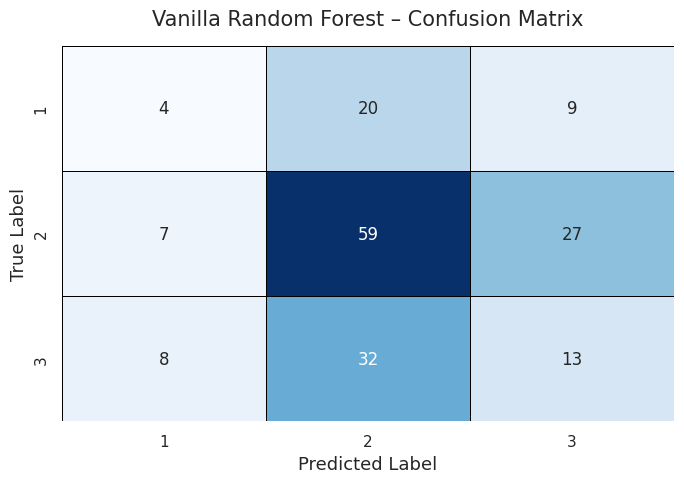

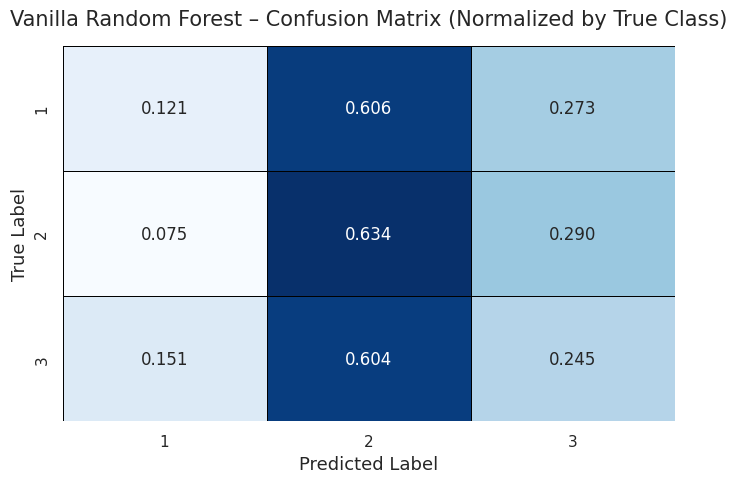

/tmp/ipython-input-1032331295.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


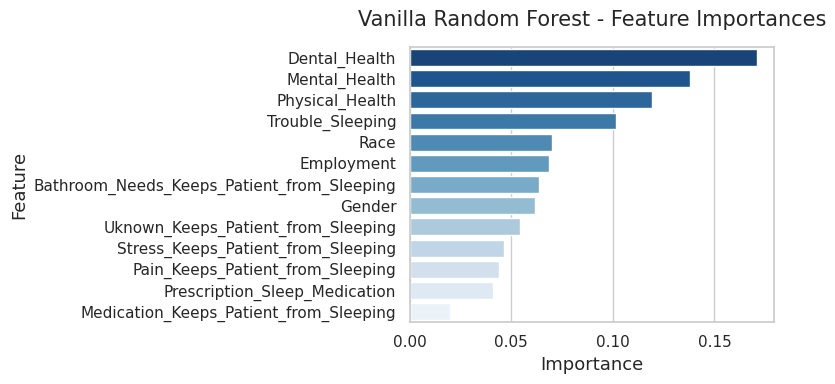

In [ ]:
rf_vanilla = RandomForestClassifier(
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rf_vanilla.fit(X_train, y_train)

rf_vanilla.get_params()

evaluate_model(
    rf_vanilla,
    X_train,
    y_train,
    X_test,
    y_test,
    name="Vanilla Random Forest"
)

plot_feature_importances(
    rf_vanilla,
    X_train.columns,
    title="Vanilla Random Forest - Feature Importances",
    top_n=15
)


In [ ]:
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 3],
    "max_features": ["sqrt", "log2"]
}

rf_base = RandomForestClassifier(
    random_state=RANDOM_STATE,
    n_jobs=-1
)

grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters found:")
print(grid_search.best_params_)
print(f"Best CV Accuracy: {grid_search.best_score_:.3f}")

rf_tuned = grid_search.best_estimator_


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 0.540



Tuned Random Forest
Test Accuracy: 0.525
Test Macro F1: 0.314

Classification Report:
              precision    recall  f1-score   support

           1      0.000     0.000     0.000        33
           2      0.528     0.903     0.667        93
           3      0.500     0.189     0.274        53

    accuracy                          0.525       179
   macro avg      0.343     0.364     0.314       179
weighted avg      0.423     0.525     0.427       179



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


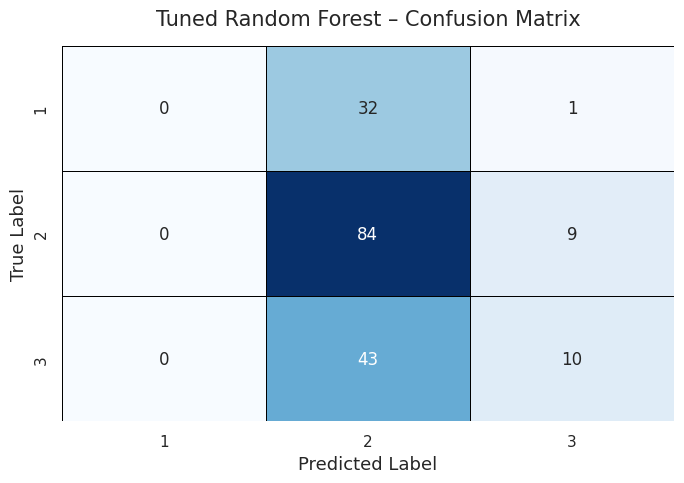

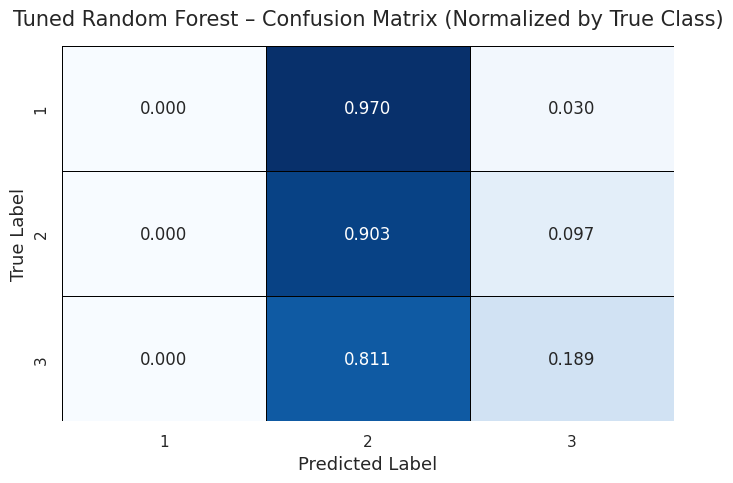

/tmp/ipython-input-1032331295.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


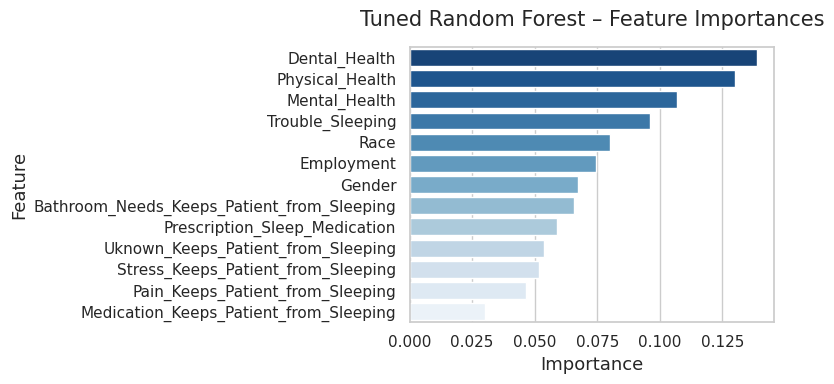

In [ ]:
evaluate_model(
    rf_tuned,
    X_train,
    y_train,
    X_test,
    y_test,
    name="Tuned Random Forest"
)

plot_feature_importances(
    rf_tuned,
    X_train.columns,
    title="Tuned Random Forest – Feature Importances",
    top_n=15
)


# DECISION TREE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
national_poll_on_healthy_aging_npha = fetch_ucirepo(id=936)

# data (as pandas dataframes)
X = national_poll_on_healthy_aging_npha.data.features
y = national_poll_on_healthy_aging_npha.data.targets

df = pd.concat([X,y], axis = 1)
df.head()

,Age,Physical_Health,Mental_Health,Dental_Health,Employment,Stress_Keeps_Patient_from_Sleeping,Medication_Keeps_Patient_from_Sleeping,Pain_Keeps_Patient_from_Sleeping,Bathroom_Needs_Keeps_Patient_from_Sleeping,Uknown_Keeps_Patient_from_Sleeping,Trouble_Sleeping,Prescription_Sleep_Medication,Race,Gender,Number_of_Doctors_Visited
0,2,4,3,3,3,0,0,0,0,1,2,3,1,2,3
1,2,4,2,3,3,1,0,0,1,0,3,3,1,1,2
2,2,3,2,3,3,0,0,0,0,1,3,3,4,1,3
3,2,3,2,3,3,0,0,0,1,0,3,3,4,2,1
4,2,3,3,3,3,1,0,0,0,0,2,3,1,2,3


In [ ]:
df = df.copy()

# drop age
if 'Age' in df.columns:
    df = df.drop(columns=['Age'])

# group doctor visits into 0-1, 2-3, 4+
def group_visits(x):
    if x <= 1:
        return "0-1"
    elif x <= 3:
        return "2-3"
    else:
        return "4+"

df['doctor_group'] = df['Number_of_Doctors_Visited'].apply(group_visits)

# label encode categorical columns
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

df.head()


,Physical_Health,Mental_Health,Dental_Health,Employment,Stress_Keeps_Patient_from_Sleeping,Medication_Keeps_Patient_from_Sleeping,Pain_Keeps_Patient_from_Sleeping,Bathroom_Needs_Keeps_Patient_from_Sleeping,Uknown_Keeps_Patient_from_Sleeping,Trouble_Sleeping,Prescription_Sleep_Medication,Race,Gender,Number_of_Doctors_Visited,doctor_group
0,4,3,3,3,0,0,0,0,1,2,3,1,2,3,1
1,4,2,3,3,1,0,0,1,0,3,3,1,1,2,1
2,3,2,3,3,0,0,0,0,1,3,3,4,1,3,1
3,3,2,3,3,0,0,0,1,0,3,3,4,2,1,0
4,3,3,3,3,1,0,0,0,0,2,3,1,2,3,1


In [ ]:
# features
X = df.drop(columns=['doctor_group', 'Number_of_Doctors_Visited'])
y = df['doctor_group']

# train/test split (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((535, 13), (179, 13))

In [ ]:
dt = DecisionTreeClassifier(
    max_depth=None,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)

dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Weighted F1 Score:", f1_score(y_test, y_pred, average="weighted"))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6703910614525139
Weighted F1 Score: 0.6874831365576708

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.27      0.23        33
           1       0.82      0.76      0.79       146

    accuracy                           0.67       179
   macro avg       0.51      0.52      0.51       179
weighted avg       0.71      0.67      0.69       179



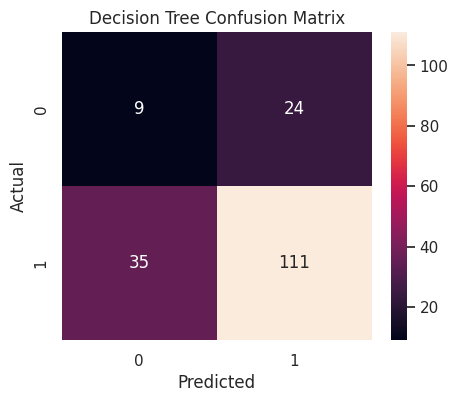

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=dt.classes_,
            yticklabels=dt.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()


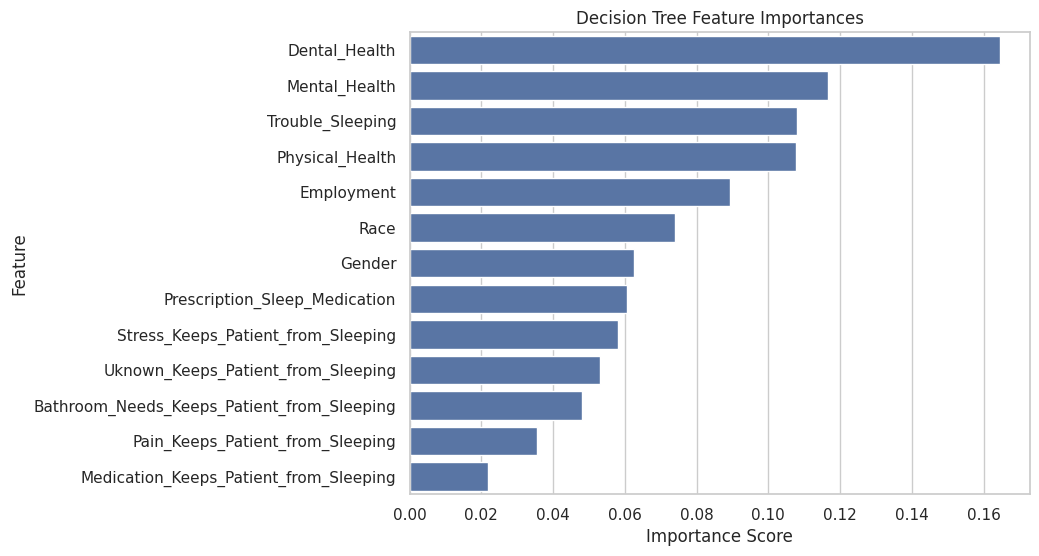

,0
Dental_Health,0.164560
Mental_Health,0.116689
Trouble_Sleeping,0.107972
Physical_Health,0.107630
Employment,0.089273
Race,0.074060
Gender,0.062680
Prescription_Sleep_Medication,0.060616
Stress_Keeps_Patient_from_Sleeping,0.058141
Uknown_Keeps_Patient_from_Sleeping,0.052985


In [ ]:
importances = pd.Series(dt.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Decision Tree Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

importances.head(10)
